In [124]:
# from os import getenv
import pymssql
import pandas as pd
# print(pymssql.__version__)
server = "41.221.51.164"
user = "sa"
password = "X$OUDDVC8)"
database = "eOXEGEN"
prev_database = "eOXEGEN_P"
pd.set_option("display.max_columns", 150)

In [125]:
#Defining the connection for current database
con = pymssql.connect(server, user, password, database)
cursor = con.cursor()

### <p>We would check the specific records out of all the claims based on the claim_id, membership_no and policy_code.</p>  

In [126]:
# This is the query section
query="""SELECT CLAIMED_AMOUNT, ENTRY_TIME FROM eOXEGEN.dbo.INS_RC_CLAIM_INWARD WHERE CLAIMED_AMOUNT>0 AND 
CLAIM_IS_ACTIVE=1 AND INS_COMP_ID='2017070311422763433871010' """

query_p="""SELECT CLAIMED_AMOUNT, ENTRY_TIME FROM eOXEGEN_P.dbo.INS_RC_CLAIM_INWARD WHERE CLAIMED_AMOUNT>0 AND 
CLAIM_IS_ACTIVE=1 AND INS_COMP_ID ='2013103010013740490475574' """


In [127]:
cursor.execute(query)
df1 = pd.read_sql(query, con)
con.close()
#Defining the connection for the previous database
con_p = pymssql.connect(server, user, password, prev_database)
cursor_p= con_p.cursor()
cursor_p.execute(query_p)
df2=pd.read_sql(query_p,con_p)
con_p.close()
# print (time.clock() - start_time, "df seconds", type(df))


In [128]:
print("The length of df1 is {} and df2 is {}".format(len(df1),len(df2)))

The length of df1 is 182713 and df2 is 587849


In [129]:
# Backup dataframe incase to work offline
dn=df1.copy()
do=df2.copy()

In [130]:
df1=dn
df2=do

In [131]:
df2.index=range(len(df1),len(df1)+len(df2))

In [132]:
concating=[df1,df2]
df=pd.concat(concating)

In [133]:
dff=df.copy()

In [134]:
dff['ENTRY_TIME'] = pd.to_datetime(dff['ENTRY_TIME'], format='%Y-%m-%d HH:MM:SSSSSS').dt.strftime(date_format='%Y-%m-%d')

In [135]:
dff['CLAIMED_SUM'] = dff['CLAIMED_AMOUNT'].groupby(dff['ENTRY_TIME']).transform('sum')

In [136]:
dff = dff.drop(columns=['CLAIMED_AMOUNT',],axis=1)

In [137]:
dff = dff.drop_duplicates(keep='first')

In [138]:
# print (dff.groupby(['ENTRY_TIME']).size())

In [139]:
# dff['ENTRY_TIME'] = pd.to_datetime(dff['ENTRY_TIME'], format='%Y-%m-%d HH:MM:SSSSSS').dt.strftime(date_format='%Y-%m-%d')
dff=dff.sort_values(by=['ENTRY_TIME'])
dff['ENTRY_TIME'] = pd.to_datetime(dff['ENTRY_TIME'])
# dff.head(4)

In [140]:
dff.head()

,ENTRY_TIME,CLAIMED_SUM
569668,2016-04-07,183800.00
572384,2016-04-08,6786600.00
576598,2016-04-09,3702000.00
576644,2016-04-11,7146424.94
185257,2016-04-12,9668139.29


In [141]:
# dff.describe()
dff.info()
print(len(dff))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 569668 to 674314
Data columns (total 2 columns):
ENTRY_TIME     1063 non-null datetime64[ns]
CLAIMED_SUM    1063 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.9 KB
1063


In [142]:
dff['CLAIM_DATE'] = dff['ENTRY_TIME'].apply(lambda x:x.strftime('%Y-%m'))

In [143]:
dff['CLAIM_DATE'] = pd.to_datetime(dff['CLAIM_DATE'])

In [144]:
dff.head()
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# %matplotlib inline
# dff['ENTRY_TIME'] = pd.to_datetime(dff['ENTRY_TIME'])
# dff=dff.groupby(dff['ENTRY_TIME'].dt.strftime('%Y-%m-%d'))['CLAIMED_SUM'].sum()#.sort_values()
# dff.plot()

,ENTRY_TIME,CLAIMED_SUM,CLAIM_DATE
569668,2016-04-07,183800.00,2016-04-01
572384,2016-04-08,6786600.00,2016-04-01
576598,2016-04-09,3702000.00,2016-04-01
576644,2016-04-11,7146424.94,2016-04-01
185257,2016-04-12,9668139.29,2016-04-01


In [145]:
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# %matplotlib inline
# df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'])
# df=df.groupby(df['ENTRY_TIME'].dt.strftime('%Y-%m-%d'))['CLAIMED_AMOUNT'].sum()#.sort_values()
# print(df.head())
# df.plot()
dff['CLAIM_AMOUNT'] = dff['CLAIMED_SUM'].groupby(dff['CLAIM_DATE']).transform('sum')
df = dff.drop(columns=['CLAIMED_SUM','ENTRY_TIME'],axis=1)
df = df.drop_duplicates(keep='first')

In [ ]:
df.head()

## USING SINGLE WINDOW TECHNIQUE STARTS
# <hr>

In [209]:
pf=df.copy()
len(pf)
pf.drop(columns=['CLAIM_DATE'], axis=1, inplace=True)

In [210]:
pf.head()

,CLAIM_AMOUNT
569668,3.906541e+07
221750,2.502903e+07
266218,5.109634e+08
342230,1.143072e+09
431695,1.029719e+09


In [211]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import backend as K
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [212]:
# load the dataset
# dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe=pf
dataset = dataframe.values
dataset = dataset.astype('float32')

In [213]:
print(len(dataframe))

40


In [214]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.72)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
# look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [215]:
import os
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions

dname='aar_timeseries.h5'
model.save(os.path.join('/home/rasello/projects/AAR_JUPYTER',dname))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
K.clear_session()
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
 - 1s - loss: 0.4609
Epoch 2/100
 - 0s - loss: 0.3997
Epoch 3/100
 - 0s - loss: 0.3435
Epoch 4/100
 - 0s - loss: 0.2929
Epoch 5/100
 - 0s - loss: 0.2459
Epoch 6/100
 - 0s - loss: 0.2029
Epoch 7/100
 - 0s - loss: 0.1643
Epoch 8/100
 - 0s - loss: 0.1317
Epoch 9/100
 - 0s - loss: 0.1043
Epoch 10/100
 - 0s - loss: 0.0807
Epoch 11/100
 - 0s - loss: 0.0647
Epoch 12/100
 - 0s - loss: 0.0525
Epoch 13/100
 - 0s - loss: 0.0438
Epoch 14/100
 - 0s - loss: 0.0384
Epoch 15/100
 - 0s - loss: 0.0353
Epoch 16/100
 - 0s - loss: 0.0334
Epoch 17/100
 - 0s - loss: 0.0322
Epoch 18/100
 - 0s - loss: 0.0314
Epoch 19/100
 - 0s - loss: 0.0313
Epoch 20/100
 - 0s - loss: 0.0311
Epoch 21/100
 - 0s - loss: 0.0306
Epoch 22/100
 - 0s - loss: 0.0306
Epoch 23/100
 - 0s - loss: 0.0305
Epoch 24/100
 - 0s - loss: 0.0302
Epoch 25/100
 - 0s - loss: 0.0300
Epoch 26/100
 - 0s - loss: 0.0298
Epoch 27/100
 - 0s - loss: 0.0296
Epoch 28/100
 - 0s - loss: 0.0295
Epoch 29/100
 - 0s - loss: 0.0294
Epoch 30/100
 - 0s - lo

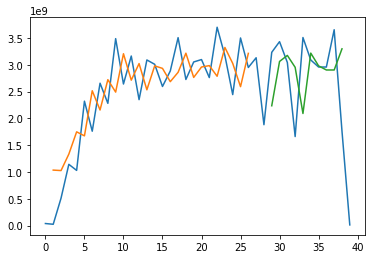

In [216]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [217]:
from keras.models import load_model
modelV = load_model(os.path.join('/home/rasello/projects/AAR_JUPYTER','aar_timeseries.h5'))

In [233]:
predict=pf[:10]
predict=predict.values
predict=predict.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(predict)
dataX=numpy.reshape(data,(data.shape[0],1,data.shape[1]))
dataX=dataX

In [234]:
dataX[0]

array([[0.0040542]], dtype=float32)

In [235]:
result=model.predict(dataX)
act_res=scaler.inverse_transform(result)

NotFoundError: PruneForTargets: Some target nodes not found: group_deps 

# <hr>
## USING SINGLE WINDOW TECHIQUE ENDS

In [111]:
# frame a sequence as a supervised learning problem
# this methods will create a column and column value will be 1 shift from the data. 
# it will make our data to supervised so that we can feed into network
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [112]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [113]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

<hr>

In [114]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [115]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [116]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [117]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size, verbose=0)
    return yhat[0,0]

In [118]:
from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib.dates as mdates
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import TimeSeriesSplit
import numpy as np

In [ ]:
# convert our column to pandas series 
series = pd.Series(df)
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_size = int(len(supervised_values) * 0.80)
train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [120]:
import numpy

In [121]:
# repeat 30 times
repeats = 15
# variable for keep track of error scores
error_scores = list()
for r in range(repeats):
    # let's train
    lstm_model = fit_lstm(train_scaled, 1, 15, 4)
    predictions = list()
    # let's predict for test case
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        # report performance
    rmse = sqrt(mean_squared_error(raw_values[train_size:len(supervised_values)], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    error_scores.append(rmse)

NameError: name 'train_scaled' is not defined

In [29]:
results = pd.DataFrame()
results['rmse'] = error_scores

In [61]:
import matplotlib
print(matplotlib.__version__)

2.2.2


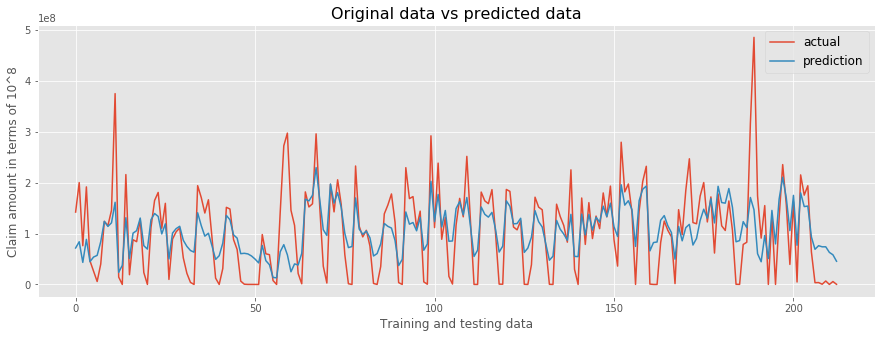

In [63]:
# line plot of observed vs predicted
# from matplotlib import matplotlib.axes.Axes.set_xlabel
# from matplotlib import matplotlib.axes.Axes.set_ylabel
# fig = plt.figure()
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(15,5))
# plt.figure(figsize=(15, 5))
ax.set_xlabel('Training and testing data',fontsize=12)
ax.set_ylabel('Claim amount in terms of 10^8',fontsize=12)
ax.set_title('Original data vs predicted data',fontsize =16)
ax.plot(raw_values[train_size:len(supervised_values)],label='actual')
ax.plot(predictions,label='prediction')
# ax.set_xlabel('xlabel')
# ax.set_ylabel('ylabel')
# plt.plot(raw_values[train_size:len(supervised_values)],label='actual')
# plt.plot(predictions,label='prediction')
ax.legend(loc='upper right',shadow=False,fontsize='large')
# plt.title('Original data vs predicted data', fontsize=16)
# # ax = plt.gca()
# # ax.get_yaxis().set_scientific().set_useOffset(False)
# # plt.set_xlabel('xlabel')
# ax1.set_xlabel('time (s)')
# plt.xlabel(xlabel='Number of epochs')
# # plt.set_ylabel('ylabel')
# plt.ylabel(ylabel='Claim amount in terms of 10^8')
# plt.legend()
plt.show()

## <hr>
## Prediction part starts

In [29]:
latest_ten=dff.iloc[-9:]
print(latest_ten)

        ENTRY_TIME  CLAIMED_SUM
179583  2019-06-20  63781565.23
668076  2019-06-25   3459208.57
668164  2019-06-26   3683470.00
671271  2019-06-29    466280.00
671283  2019-07-02   6768544.00
671286  2019-07-03     38000.00
674297  2019-07-05   5719331.10
674313  2019-07-10    282523.83
674316  2019-07-13    294112.00


In [41]:
val1=dff.tail(1)
f=np.array(pd.DataFrame(val1).iloc[0]['CLAIMED_SUM'])
print (f)
scaler=MinMaxScaler(feature_range=(-1,1))
f = np.reshape(f, (1, 1))
scale=scaler.fit(f)
train =f.reshape(1,1)
train_scaled=scaler.transform(train)

294112.0


In [42]:
import os

In [ ]:
dname='modelTimeSeries.h5'
lstm_model.save(os.path.join('/home/rasello/projects/AAR_JUPYTER',dname))

In [43]:
from keras.models import load_model
modelV = load_model(os.path.join('/home/rasello/projects/AAR_JUPYTER','modelTimeSeries.h5'))

In [48]:
# initial record
initial = train_scaled
# store prediction
prediction = []
# range 3 because we want the prediction for next 40 months
for i in range(4):
    # predict 
    yhat = forecast_lstm(modelV, 1, initial)
    # inverse prediction to it's original value
    yhat_inver = scaler.inverse_transform(np.reshape(yhat,(1,1)))
    # append to our prediction variable
    prediction.append(yhat_inver)
    # re initial our initial variable so that it feed the current predicted value as input for forecast
    initial = np.array([yhat])

In [49]:
prediction = np.concatenate(prediction, axis=0 ).tolist()
prediction = [item for sublist in prediction for item in sublist]
prediction = pd.DataFrame(prediction)

In [50]:
from datetime import datetime
date=datetime.now().date()


rng = pd.date_range(str(date), periods=4)
rng = pd.DataFrame(rng)
prediction = pd.merge(rng, prediction, left_index=True, right_index=True, how='outer')
prediction.set_index('0_x')
prediction.columns = ['ENTRY_TIME', 'CLAIMED_SUM']
# prediction

In [51]:
prediction

,ENTRY_TIME,CLAIMED_SUM
0,2019-07-31,294112.65625
1,2019-08-01,294112.71875
2,2019-08-02,294112.65625
3,2019-08-03,294112.56250


In [52]:
prediction = prediction.iloc[1:]
prediction
prediction['ENTRY_TIME'] = pd.to_datetime(prediction['ENTRY_TIME'], format='%Y-%m-%d HH:MM:SSSSSS').dt.strftime(date_format='%Y-%m-%d')

dates=[]
claimed_amount=[]
for i in latest_ten.ENTRY_TIME:
    dates.append(i)    
for j in prediction.ENTRY_TIME:
    dates.append(j)
for k in latest_ten.CLAIMED_SUM:
    claimed_amount.append(k)
for l in prediction.CLAIMED_SUM:
    claimed_amount.append(l)
dates

/home/rasello/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['2019-06-20',
 '2019-06-25',
 '2019-06-26',
 '2019-06-29',
 '2019-07-02',
 '2019-07-03',
 '2019-07-05',
 '2019-07-10',
 '2019-07-13',
 '2019-08-01',
 '2019-08-02',
 '2019-08-03']

In [53]:
claimed_amount

[63781565.23,
 3459208.5700000003,
 3683470.0,
 466280.0,
 6768544.0,
 38000.0,
 5719331.1,
 282523.83,
 294112.0,
 294112.71875,
 294112.65625,
 294112.5625]

In [ ]:
latest_ten.append(prediction, ignore_index=True)

In [128]:
combination=[latest_ten,prediction]
results=pd.concat(combination, sort=True)
results

,CLAIMED_SUM,ENTRY_TIME
179583,6.378157e+07,2019-06-20
668076,3.459209e+06,2019-06-25
668164,3.683470e+06,2019-06-26
671271,4.662800e+05,2019-06-29
671283,6.768544e+06,2019-07-02
671286,3.800000e+04,2019-07-03
674297,5.719331e+06,2019-07-05
674313,2.825238e+05,2019-07-10
674316,2.941120e+05,2019-07-13
0,2.941126e+05,2019-07-31 00:00:00


## CONNECTION USING PYODBC

In [ ]:
import pyodbc 

In [ ]:
cnxn = pyodbc.connect("Driver={ODBC Driver 17.2 for SQL Server};"
                    "Server=41.221.51.164;"
                      "Database=eOXEGEN;"
                      "Trusted_Connection=yes;"
                      "uid=sa;"
                      "pwd=X$OUDDVC8)")

In [ ]:
cursor = cnxn.cursor()
query='SELECT * FROM [eOXEGEN].[dbo].[HMS_CITY]'
cursor.execute(query)
df = pd.read_sql(query, cnxn)

for row in cursor:
    print('row = %r' % (row,))

In [5]:
def fun():
    list1=[]
    list2=[]
    list1.append(5)
    list1.append('apple')
    list1.append(True)
#     list2.append("orange")
    dic={'a':list1, 'b':list2}
    return dic
    

In [8]:
a=fun()
print(a['b'])

[]


In [9]:
list1=[]
list2=[1,2,3]
list1=list1+list2
list1

[1, 2, 3]

In [10]:
list3=[4,5]
list1=list1+list3

In [11]:
print(list1)

[1, 2, 3, 4, 5]


In [ ]:
for i in